In [62]:
using Gadfly
using DataFrames
using DifferentialEquations
using CSV

LoadError: [91mArgumentError: Module DataTables not found in current path.
Run `Pkg.add("DataTables")` to install the DataTables package.[39m

In [138]:
df0 = readtable("exp0.csv")
df1 = readtable("exp1.csv")
df2 = readtable("exp2.csv")
df3 = readtable("exp3.csv")
df_all = vcat(df0, df1, df2, df3)

,t,x,y,exp_id
1,0.0,100.0,50.0,exp0
2,0.012802677460588996,34.58725284498969,115.18606367085539,exp0
3,0.018919261001665764,16.19807022539886,132.96014330491576,exp0
4,0.027304524922040403,5.100102643985343,142.97371052040498,exp0
5,0.033115660589278346,2.2193071127159616,145.03666349708658,exp0
6,0.0398339464100505,0.84181396230036,145.4471788248867,exp0
7,0.045838234801419755,0.3540279457578101,145.06597183987344,exp0
8,0.05208876317018196,0.14420135154018549,144.37258952727282,exp0
9,0.05812258618983138,0.06086435467892261,143.58772441640932,exp0
10,0.0642212238527836,0.025579575971459108,142.75010890241373,exp0


In [81]:
DataFrames.aggregate(df_all, :exp_id, [minimum, maximum, mean])

,exp_id,t_minimum,t_maximum,t_mean,x_minimum,x_maximum,x_mean,y_minimum,y_maximum,y_mean
1,exp0,0.0,50.0,17.560067135560647,5.0490893664474096e-12,100.0,2.7758269258843096,1.1354081831756145e-11,145.4471788248867,43.366945965392404
2,exp1,0.0,50.0,25.207432578441974,3.8308800186200605e-12,120.0,7.083936700249175,1.1363630706155449e-10,104.3981035812818,12.755983696272288
3,exp2,0.0,50.0,22.686122264465833,1.580118512723818e-11,150.0,3.940268307970585,0.0004912052852357482,157.50138259485985,20.408858593647025
4,exp3,0.0,50.0,19.085859518526473,4.7771744796919196e-12,200.0,4.388136407367866,7.820035830084066e-13,139.7750767575568,35.73834921061126


In [86]:
df_all[:diff] = df_all[:y] - df_all[:x]
df_all

,t,x,y,exp_id,diff
1,0.0,100.0,50.0,exp0,-50.0
2,0.012802677460588996,34.58725284498969,115.18606367085539,exp0,80.5988108258657
3,0.018919261001665764,16.19807022539886,132.96014330491576,exp0,116.7620730795169
4,0.027304524922040403,5.100102643985343,142.97371052040498,exp0,137.87360787641964
5,0.033115660589278346,2.2193071127159616,145.03666349708658,exp0,142.8173563843706
6,0.0398339464100505,0.84181396230036,145.4471788248867,exp0,144.60536486258633
7,0.045838234801419755,0.3540279457578101,145.06597183987344,exp0,144.71194389411562
8,0.05208876317018196,0.14420135154018549,144.37258952727282,exp0,144.22838817573265
9,0.05812258618983138,0.06086435467892261,143.58772441640932,exp0,143.5268600617304
10,0.0642212238527836,0.025579575971459108,142.75010890241373,exp0,142.72452932644228


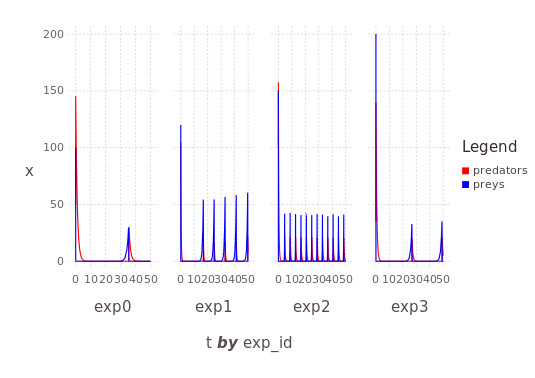

In [120]:
plot(df_all, xgroup="exp_id", x="t", y="x",
    Geom.subplot_grid(
        layer(Geom.line, Theme(default_color=colorant"blue")),
        layer(df_all, xgroup="exp_id", y="y", Geom.line, Theme(default_color=colorant"red")),
        free_y_axis=true
    ),Guide.manual_color_key("Legend", ["predators", "preys"], ["red", "blue"])
)

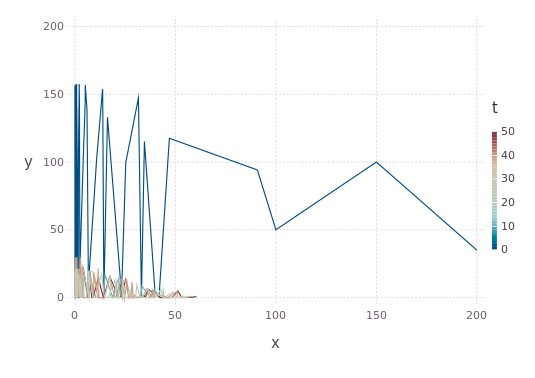

In [140]:
# Round to multiple of 5
df_all[:t]=map(t -> round(Int64, round(t/10) * 10), df_all[:t])
plot(df_all, x="x", y="y", colour="t", Geom.line)